<a href="https://colab.research.google.com/github/nishreenk/UDACITY_DATA_SCIENCE_NANO/blob/main/TheraBank_workbook_Nishrin_Kachwala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJECT Thera Bank Personal Loan Campaign - Nishrin Kachwala
## OBJECTIVE:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

## Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
## Domain: Banking
## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

Attribute Information:
 ID: Customer ID
 Age: Customer's age in completed years
 Experience: #years of professional experience
 Income: Annual income of the customer ($000)
 ZIP Code: Home Address ZIP code.
 Family: Family size of the customer
 CCAvg: Avg. spending on credit cards per month ($000)
 Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
 Mortgage: Value of house mortgage if any. ($000)
 Personal Loan: Did this customer accept the personal loan offered in the last campaign?
 Securities Account: Does the customer have a securities account with the bank?
 CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
 Online: Does the customer use internet banking facilities?
 Credit card: Does the customer use a credit card issued by the bank?

**Import the datasets and libraries, check datatype, statistical summary, shape**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/UTA_AIML/TheraBank'

/content/drive/My Drive/Colab Notebooks/UTA_AIML/TheraBank


### <a id = "link1">Load the dataset</a>

In [4]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

**Check the shape of the dataset**

In [5]:
df.shape

(5000, 14)

**Get the info data types column wise**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### Check for null values or incorrect imputation.


Insights: There are 5000 data rows and none of the values are NULL (missing). All data types are either integer or float. There are 'zero' object data-type

In [8]:
df.isnull().sum()    # returns how many missing values exist in the dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df[df < 0].count(axis=0)

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

There are 52 'Experience' which are noted as negative in the dataset.

In [10]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [11]:
#df = df.loc[df['Experience'].clip(lower=0)] 

In [12]:
# pandas converting negative numbers in 'Experience' to absolute values. 
df['Experience'] = df['Experience'].abs()

**Get summary statistics around the numerical columns**

In [13]:
df.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.134600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.415189,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


The average age of liability customers that have a relationship with the bank is ~45years, with an mean income of 74K dollars, with an mean house mortage of ~51K. And have ~2.4 family members in the household.

** EDA: Number of unique in each column? **     

In [14]:
df.nunique()            

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [15]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

# Dropping 'ID' column as all the values are unique and this column does not provide any insights to the loan campaign
# The Zip Code represents region and region wise distribution of customers is not considered, in case there is a bias against people in a particluar zip code
# therefore dropping 'ZIP Code'

0    90.4
1     9.6
Name: Personal Loan, dtype: float64




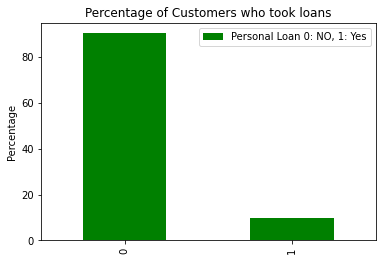

In [16]:
print(df['Personal Loan'].value_counts(normalize=True)*100)
print()
print()
(df['Personal Loan'].value_counts(normalize=True)*100).plot(kind='bar', color='green', label='0')
plt.ylabel("Percentage")
plt.legend(labels=['Personal Loan 0: NO, 1: Yes'])
plt.title('Percentage of Customers who took loans')
plt.show()

**We can see that we are dealing with a higly imbalanced dataset, where majority of the deposit customers did not convert to loan customers.**

# ** EDA: Number of people with zero mortgage? **   

In [18]:
(df['Mortgage'] == 0).sum()  #count of people having home mortgage as zero, Most of the people donot have mortgage

3462

** Number of people with zero credit card spending per month? **      
is 106

In [19]:
df['CCAvg'].isin([0]).sum()

106

** Value counts of all categorical columns **  


for ther rest of the variables '0' is No and '1' is Yes.

In [20]:
df_cat = df[['Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard']].sum().reset_index().rename(columns={'index':'Category_Name',0:"Yes_1"})
df_cat['No_0'] = df.shape[0] - df_cat['Yes_1']
print(len(df))
df_cat['%Yes'] = np.round(100*(df_cat['Yes_1']/len(df)),1)
df_cat

5000


,Category_Name,Yes_1,No_0,%Yes
0,Personal Loan,480,4520,9.6
1,Securities Account,522,4478,10.4
2,CD Account,302,4698,6.0
3,Online,2984,2016,59.7
4,CreditCard,1470,3530,29.4


Liability customers with personal loans are only  9.6%, and those with a CD account are only 6%

In [21]:
df_categorical = df[['Family', 'Education']]
#df_categorical = df[['Family', 'Education', 'Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard']]
for i in df_categorical.columns:
    x = df_categorical[i].value_counts().sort_values()
    print("Column name is:",i, "and its value count is:",'\n', x)
    print()

Column name is: Family and its value count is: 
 3    1010
4    1222
2    1296
1    1472
Name: Family, dtype: int64

Column name is: Education and its value count is: 
 2    1403
3    1501
1    2096
Name: Education, dtype: int64




Family is Family size of the customer

Education Level. 1: Undergrad; 2: Graduate;3:  Advanced/Professional

Most liability customers are graduates and they are either single or with a family of 4.

# Univariate and Bivariate Analysis

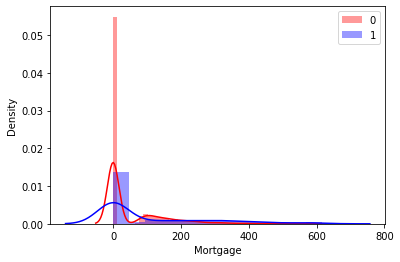

In [22]:
sns.distplot(df[df['Personal Loan']==0]['Mortgage'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Mortgage'],color='b',label=1)
plt.legend()
plt.show()

# Most people with zero mortgages are not taking personal loans

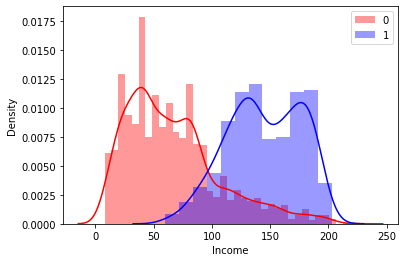

In [23]:
sns.distplot(df[df['Personal Loan']==0]['Income'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['Income'],color='b',label=1)
plt.legend()
plt.show()

# Number of People with higher income taking personal loans are high as compared to low income

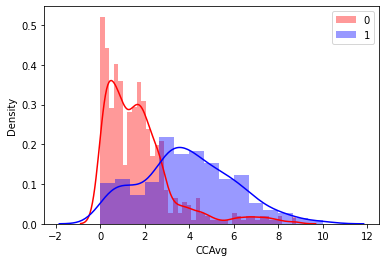

In [24]:
sns.distplot(df[df['Personal Loan']==0]['CCAvg'],color='r',label=0)
sns.distplot(df[df['Personal Loan']==1]['CCAvg'],color='b',label=1)
plt.legend()
plt.show()

# People with high average credit card spending per month are taking more personal loans

** I AM REPLACING MORTGAGE NUMERICAL VALUES WITH 1: INDICATING A MORTGAGE RELATIONSHIP WITH THE BANK, AND 0 VALUES INDICATION NO RELATIONSHIP WITH BANK ** CONVERTING MORTGAGE TO A CATEGORICAL VARIABLE

In [25]:
#90% values are 0, indicating no relationship with Bank. 
df['Mortgage'] = df['Mortgage'].apply(lambda x:1 if x>0 else 0)
df.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,1,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,1,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


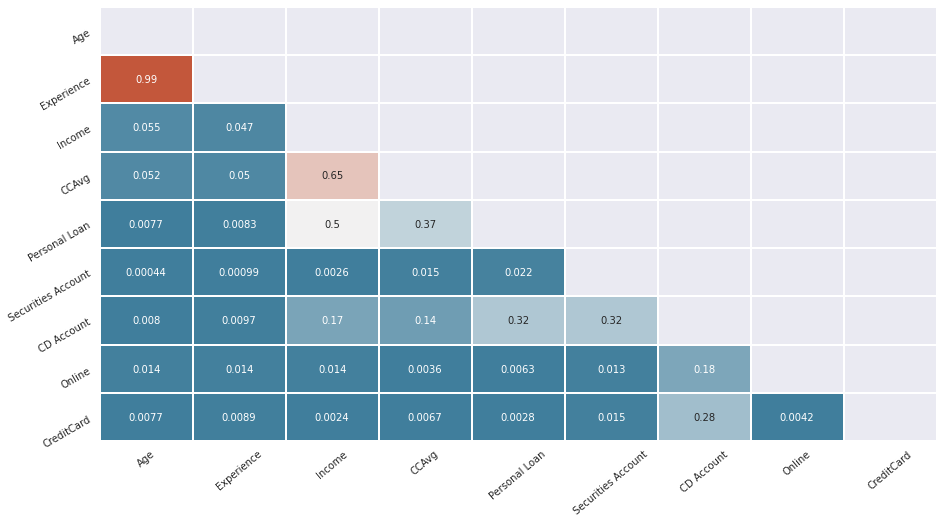

In [26]:
df['Mortgage'] = df['Mortgage'].astype('category')
df['Family'] = df['Family'].astype('category')
df['Education'] = df['Education'].astype('category')

corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'dark')  # Setting it to white so that we do not see the grid lines
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(lower_triangle, center=0.5, cmap= cmap, annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   
plt.xticks(rotation = 40)   
plt.yticks(rotation = 30)   
plt.show()

There is a very high positive correlation between age and Experience.

The pairplot shows that Age and Experience have uniform distribution and that
Income and CCAvg is positively skewed

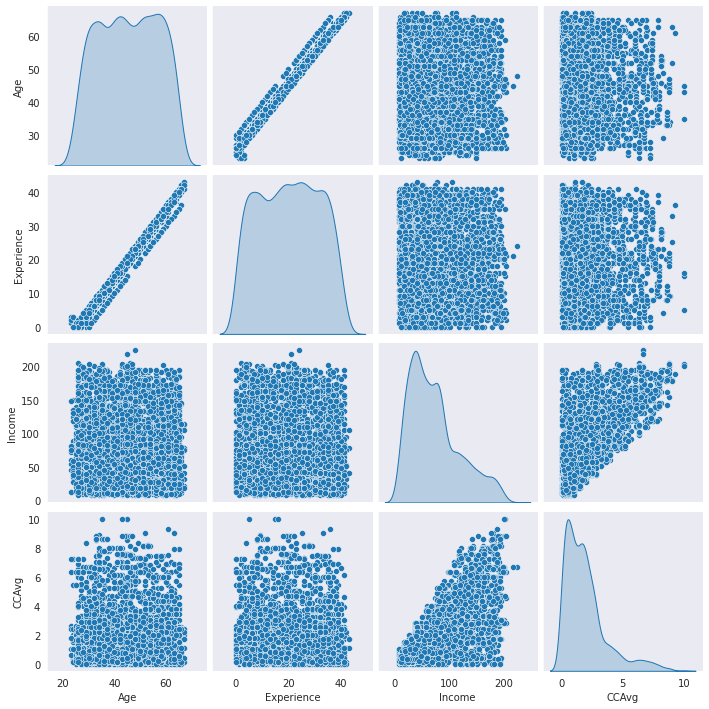

In [27]:
sns.pairplot(df[['Age', 'Experience', 'Income', 'CCAvg', ]],diag_kind='kde')
plt.show()

Age and Experience has 0.99 correlation therefore dropping Experience.

In [28]:
df.drop('Experience',axis=1,inplace=True) 

Looking at the boxplots of skewed data distribution for Income and CCAvg to see outlier behaviour.

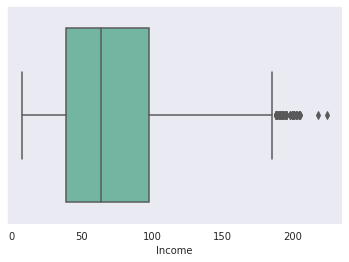

In [29]:
ax = sns.boxplot(x=df['Income'],palette="Set2")


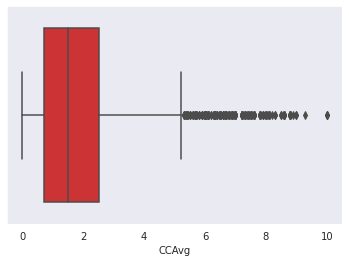

In [30]:

ax = sns.boxplot(x=df['CCAvg'],palette="Set1")


In [31]:
df['Securities Account'].value_counts(normalize=True)


0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

In [32]:
df.head(10)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
5,37,29,4,0.4,2,1,0,0,0,1,0
6,53,72,2,1.5,2,0,0,0,0,1,0
7,50,22,1,0.3,3,0,0,0,0,0,1
8,35,81,3,0.6,2,1,0,0,0,1,0
9,34,180,1,8.9,3,0,1,0,0,0,0


In [36]:
df['CD Account'].value_counts(normalize=True)

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

In [37]:
df['Education'].value_counts(normalize=True)

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

In [38]:
age_bin = pd.cut(df['Age'],bins=7).value_counts(sort=False)   
age_bin


(22.956, 29.286]    488
(29.286, 35.571]    786
(35.571, 41.857]    722
(41.857, 48.143]    881
(48.143, 54.429]    782
(54.429, 60.714]    794
(60.714, 67.0]      547
Name: Age, dtype: int64

Insight: Balanced number of age groups considered/applied for Personal loans

In [39]:
pd.crosstab(df['Education'],df['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


 Insights:
 No difference between Education Level 2 and 3, could be flattened. 

In [40]:
pd.crosstab(df['CD Account'],df['Personal Loan'],normalize='index')


Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


92% Customers without the personal loan also donot have a CD account, and those with a CD account are split about halfway between having a personal loan or not.

### <a id = "link2">Split the dataset</a>
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [48]:
# Dropping the outcome 'Personal Loan' column from the features column (mx13)
#Y = df_cln['Personal Loan']   # Predicted class (1=True, 0=False) (mx1)
Y = df.loc[:, df.columns == 'Personal Loan']
#X = cln_df[['Age','Experience','Income', 'CCAvg', 'Online', 'CreditCard', "Education"]]
X = df.drop(columns = {'Personal Loan'})

In [50]:
X = pd.get_dummies(X,drop_first=True)

In [51]:
X.head()

,Age,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1
0,25,49,1.6,1,0,0,0,0,0,1,0,0,0
1,45,34,1.5,1,0,0,0,0,1,0,0,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,1,0,0
4,35,45,1.0,0,0,0,1,0,0,1,1,0,0


In [52]:
Y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [90]:
 
# 42 is just any random seed number
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=42)

X_train.head(10)



,Age,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1
1840,55,23,0.4,0,0,0,0,0,0,1,0,1,1
2115,57,30,1.4,0,0,0,0,0,1,0,0,0,0
4437,63,63,1.5,0,0,1,0,1,0,0,0,0,0
1146,31,71,0.1,1,0,0,0,0,0,0,0,0,1
2486,61,130,1.3,0,0,0,0,0,0,0,0,0,1
44,46,104,5.7,0,0,1,1,0,0,0,0,0,0
2154,32,45,2.4,0,0,0,0,0,0,0,1,0,0
1526,36,80,2.2,0,0,1,0,0,0,1,1,0,0
4855,58,130,2.7,0,0,1,0,1,0,0,0,0,0
1378,54,34,0.1,0,0,1,0,0,0,1,0,1,0


In [91]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


** SOME PARAMETER TUNING **
WHICH FACTORS INFLUENCE THE MODEL? (solver, threshold, iterations, tried  class_weight='balanced' to balance the imbalanced data using weights)

** Iterate over different Solvers And the number of max iterations 'max_iter'**

In [92]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

In [113]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'
#, class_weight='balanced'
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42, max_iter =100, penalty='l2', solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.957, 0.955, 0.955, 0.911, 0.902]

[0.965, 0.964, 0.96, 0.91, 0.907]


**Insights**
Highest accuracy with 'newton-cg' 

Changing iterations from 100 to 300 did not change the Train/Test Score much

MY 2 CENTS: DATA(WHICH PARAMETERS TO INCLUDE/EXCLUDE/IMPUTE) HAVE A BIGGER INFLENCE ON THE MODEL THAN MODEL PARAMETERS

**Looping over different Thresholds 'C' **
Converges at a lower Inverse Regularization or C value, between 0.3 and 0.5

The Threshold values are:
[0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.75, 1]
The Training scores are:


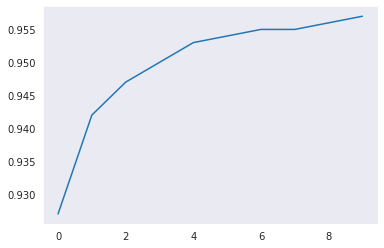

[0.927, 0.942, 0.947, 0.95, 0.953, 0.954, 0.955, 0.955, 0.956, 0.957]
The Testing scores are:
[0.919, 0.943, 0.95, 0.955, 0.957, 0.959, 0.961, 0.961, 0.964, 0.965]


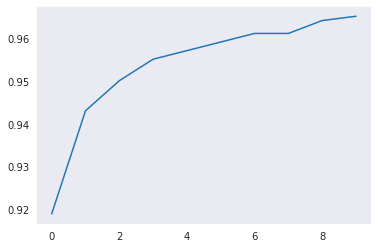

In [114]:
##### Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,  0.05,  0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.75, 1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', max_iter =100, C=i )  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
print('The Threshold values are:')    
print(C)
print('The Training scores are:')
plt.plot(train_score)
plt.show()
print(train_score)
print('The Testing scores are:')
print(test_score)
plt.plot(test_score)
plt.show()

#### **Insights **
Converges at 'C' approx 1


**Choosing Final model : Solver is Newton-CG model with  C=1  **

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [116]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.957

Testing accuracy 0.965

Recall: 0.72

Precision: 0.926

F1 Score: 0.81

Roc Auc Score: 0.857

Confusion Matrix


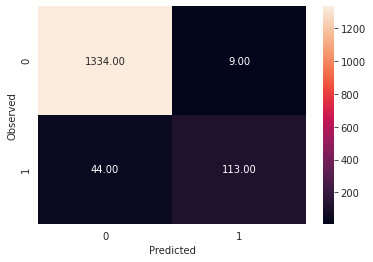

None


In [122]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l2', max_iter =100, solver='newton-cg', C=1) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Training accuracy",np.round(model.score(X_train,y_train),3))  
print()
print("Testing accuracy",np.round(model.score(X_test, y_test),3))
print()
print("Recall:",np.round(recall_score(y_test,y_predict),3))
print()
print("Precision:",np.round(precision_score(y_test,y_predict),3))
print()
print("F1 Score:",np.round(f1_score(y_test,y_predict),3))
print()
print("Roc Auc Score:",np.round(roc_auc_score(y_test,y_predict),3))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

**The final model Coefficients and Parameters **

In [121]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

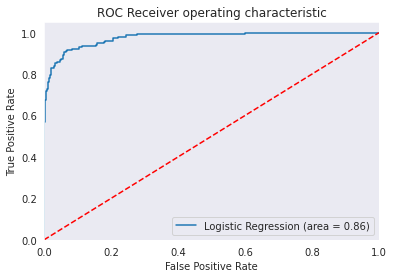

In [123]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Insights**
The ROC score still gets most of its "lift" or "rise" in the early part of the plot, i.e., for only a small fraction of the zero-predictions.
The Model data is highy imbalanced (in favor of the "zero" prediction), this is seen in high AUROC with high recall, and low precision. The model predicts mostly ones at the higher end of your prediction probabilities(mostly 1's), but most of the outcomes at the higher end of the prediction probabilities are still zero. The TheraBank marketign team is sensitive to False positives (i.e. you predict a positive or 1 when it is actually a 0), the ROC threshold of 0.4 was picked (a cutoff with high specificity or values to the left in the ROC graph).

In [124]:
y_predict = model.predict(X_test)             # Predicting the target variable on test data

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2  ...        11        12  intercept
0  0.011696  0.055062  0.155544  ...  3.254818  0.301073  -11.64372

[1 rows x 14 columns]


In [125]:
z = X_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.sample(7)

,Age,Income,CCAvg,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3,Mortgage_1,Observed Loan Status,Predicted Loan Status
4652,38,184,8.0,0,0,1,0,0,1,0,0,0,0,1,1
233,62,58,1.7,0,0,1,0,0,0,1,0,0,0,0,0
1046,51,34,0.4,0,0,0,0,0,0,1,1,0,0,0,0
3375,43,88,1.1,0,0,1,0,0,0,1,1,0,0,0,0
1196,37,71,2.7,0,0,1,0,1,0,0,0,0,1,0,0
3135,25,91,1.8,0,0,0,0,1,0,0,1,0,1,0,0
3027,53,50,0.1,0,0,1,0,0,0,1,0,1,1,0,0


**Get the Final Model score on training set**

In [127]:
np.round(model.score(X_test, y_test),3)

0.965

** Business Insights **
The retail marketing department is devising marketing campaigns to increase the Personal Loan conversion success ratio with a minimal budget. 

Here the bank wants to give loan to the people who are eligible for the Personal loan. i.e. People who are eligible (1) should not be predicted incorrectly(0) else the marketing team will loose money. We want less number of False Positives. If the number of False positives are high the marketing department will loose money targeting the wrong customers.  

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who will say yes for the personnel loan. They can use the model for upcoming customers.